<a href="https://colab.research.google.com/github/nabeelvalley/Docs/blob/master/Data%20Science%20with%20Python/image_processing_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This file is intended for use in Google Colabs (or a GPU based environment) because it will pretty much die with CPU-only

# Image Processing with Keras

> The notes in here are based on [this YouTube series](https://www.youtube.com/watch?v=4Bh3gqHkIgc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=32) from Jeff Heaton, further information on CNN's however can also be found in [this series](https://www.youtube.com/watch?v=vT1JzLTH4G4) from Stanford

In [ ]:
# Set Colab TF to 2.x

try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

TensorFlow 2.x selected.
Note: using Google CoLab


## Overview

For processing images we'll use `PIL` which enables you to use images directly in Python

To install `PIL` use:

```bash
pip install pillow
```

We'll also use the `requests` package to get images from the internet via an HTTP request

In [ ]:
IMAGE_URL = 'https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg'

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests

from io import BytesIO
from matplotlib.pyplot import imshow

from PIL import Image

We can import an image with:

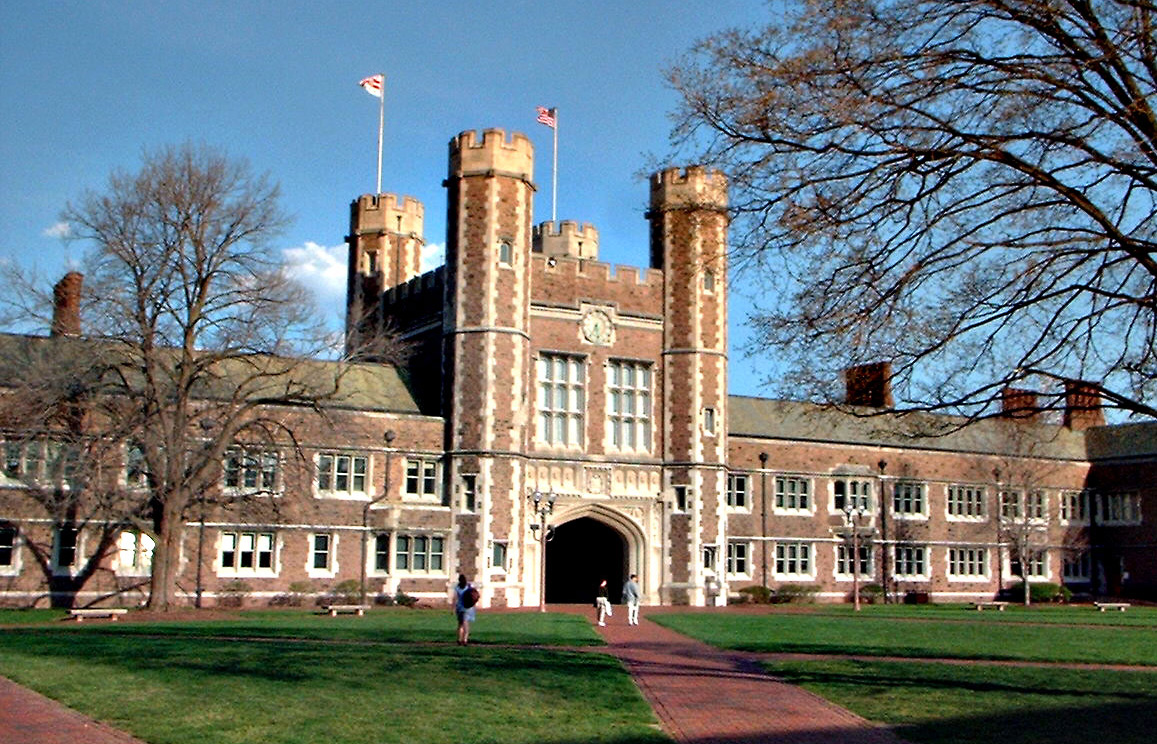

In [ ]:
response = requests.get(IMAGE_URL)

img = Image.open(BytesIO(response.content))
img.load()

img

Each image that we import has it's pixels in an array grouped by position as well as color list. So for an image that's 3x3 pixels, we have an array like so:

```py
[
  [[r, g, b], [r, g, b], [r, g, b]],
  [[r, g, b], [r, g, b], [r, g, b]],
  [[r, g, b], [r, g, b], [r, g, b]],
]
```

We can see our data set by converting the image to an array:

In [ ]:
np.array(img)

array([[[ 86, 133, 177],
        [ 85, 132, 176],
        [ 84, 133, 176],
        ...,
        [ 94, 128, 153],
        [ 91, 128, 155],
        [ 94, 129, 169]],

       [[ 86, 133, 177],
        [ 88, 135, 179],
        [ 88, 137, 180],
        ...,
        [ 96, 133, 159],
        [ 92, 136, 165],
        [ 99, 141, 183]],

       [[ 83, 130, 174],
        [ 87, 134, 178],
        [ 89, 138, 181],
        ...,
        [108, 150, 175],
        [100, 149, 179],
        [ 97, 144, 186]],

       ...,

       [[127,  77,  76],
        [131,  81,  80],
        [128,  80,  76],
        ...,
        [  4,  10,  10],
        [  2,  11,  10],
        [  2,  11,  10]],

       [[132,  81,  77],
        [129,  80,  75],
        [124,  75,  70],
        ...,
        [  4,  10,  10],
        [  3,  12,  11],
        [  3,  12,  11]],

       [[140,  90,  83],
        [137,  87,  80],
        [130,  81,  74],
        ...,
        [ 11,  17,  17],
        [ 10,  19,  18],
        [ 10,  19,  18]]

Using the `PIL` library we can also generate images from an array of data, for example a 64x64 pixel image can be created whith the following:

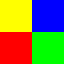

In [ ]:
w, h = 64,  64
data = np.zeros((h, w, 3), dtype=np.uint8)

def assign_pixels(rgb, row_start, col_start):
  for row in range(32):
    for col in range(32):
      data[row + row_start, col + col_start] = rgb

# yellow
assign_pixels([255, 255, 0], 0, 0)
# red
assign_pixels([255, 0, 0], 32, 0)
# blue
assign_pixels([0, 0, 255], 0, 32)
#green
assign_pixels([0, 255, 0], 32, 32)

img = Image.fromarray(data, 'RGB')

img

Using a combation of reading, writing, and processing using `PIL` and `numpy`. When using images some preprocessing tasks we may want to do are:

1. Size and Shape normalization
2. Greyscaling
3. Flatting of Image data to 1D array
4. Normalizing pixel values from `0 -> 255` to `-126 -> 126`

## Computer Vision

When processing computer vision we can make use of something like `Colabs` to ensure that we have a GPU to run on, otherwise these tasks can take a very long time, when setting up we'll use the `Python with GPU` configuration on Colab

When using image type data there are some distinctions to when we use NN's for other tasks:

- Usually classification
- Input is now 3 dimensional - heght, width, colour
- Data is not transformed, no Z-scores or Dummy Variables
- Processing is much slower
- Different Layer types such as Dense, Convolutional, and Max Pooling
- Data will be in the form of image files and not CSV (TF provides some mechanisms to support with this)

Some common ML DB's are the MNIST Digits and MNIST Fashion data which have the same data scructures as well as the CIFAR data which is used for ResNet training

### Convolutional Neural Networks

A Convolution Layer is a layer type that's able to scan across the previous layer, this allows it to identify features that are positioned relative to other features

In a Convolution Layer some of the things we need to specify are:

- Number of filters
- Filter size
- Stride
- Padding
- Activation Function

### Max Pooling

After a colvolution we may want to subsample the previous Convolution layer in order to either connect to an output based on a Dense layer or pass it into another Convolution Layer to identify even higher order features

Max pooling layers help us to decrease resolution

## MNIST Digit Dataset

### Importing Data

We can import the MNIST dataset from TF to use like so:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display

import tensorflow.keras 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training: X {X_train.shape} Y {y_train.shape}")
print(f"Testing : X {X_test.shape} Y {y_test.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Training: X (60000, 28, 28) Y (60000,)
Testing : X (10000, 28, 28) Y (10000,)


Based on the above we can see that we have a set of images with a size of 28x28. We can view the raw data for one of these with:

In [ ]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Or as an image using `plt.imshow`:

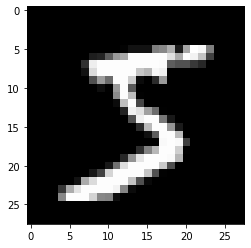

In [ ]:
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

### Training a Network

#### Preprocessing

Before training a network we'll do some preprocessing to format the data into somehting we can use directly by our network:

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

In [ ]:
# the below may be necessary to reshape the data based on the Keras backend
# for example there could be different image format requirements for TF vs
# another library that Keras is compatible with

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize the X
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

# categorize the y
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
X_train_norm.shape, X_test_norm.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

#### Train Model

1. Define Sequential Model
2. Create a few Conv2D layers
3. Use a MaxPooling2D layer to reduce the resolution
4. Flatten the data to pass to a Dense Layer
5. Use a Dense Layer
6. Add some Dropout
7. Add the output Dense Layer

In [ ]:
model = Sequential()

model.add(Conv2D(
    64,                     # number of filters
    (3, 3),                 # kernal size     
    activation='relu',      # activation function
    input_shape=input_shape # input shape
))

model.add(Conv2D(
    64,
    (3, 3),
    activation='relu'
))

model.add(MaxPooling2D(
    pool_size=(2, 2)
))

model.add(Dropout(0.25))

model.add(Flatten())       # always need to flatten when moving from Conv Layer

model.add(Dense(
    num_classes, 
    activation='softmax'
))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 129,738
Trainable params: 129,738
Non-trainable params: 0
__________________________________________________

Next, we can fit the model. Additionally we have some code to see how long the overall runtime will be for the training

In [ ]:
import time

print(f"Start: {time.ctime()}")

model.fit(
    X_train_norm, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(X_test_norm, y_test_cat)
)

print(f"End: {time.ctime()}")

Start: Sun Mar 22 15:28:46 2020
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 - 14s - loss: 0.2013 - accuracy: 0.9408 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 2/12
60000/60000 - 8s - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0469 - val_accuracy: 0.9849
Epoch 3/12
60000/60000 - 8s - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0423 - val_accuracy: 0.9862
Epoch 4/12
60000/60000 - 8s - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0361 - val_accuracy: 0.9885
Epoch 5/12
60000/60000 - 8s - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0373 - val_accuracy: 0.9874
Epoch 6/12
60000/60000 - 8s - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0344 - val_accuracy: 0.9882
Epoch 7/12
60000/60000 - 8s - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 8/12
60000/60000 - 8s - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 9/12
60000/60000 - 8s - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0355 - va

#### Evaluate Accuracy

Next we'll evaluate the accuracy of the models using our normal method:

In [ ]:
score = model.evaluate(
    X_test_norm, 
    y_test_cat, 
    verbose=0
)

print(f"Loss    : {score[0]}")
print(f"Accuracy: {score[1]}")

Loss    : 0.03515712368493842
Accuracy: 0.9901999831199646


## MNIST Fashion Dataset

### Import Data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"Training: X {X_train.shape} Y {y_train.shape}")
print(f"Testing : X {X_test.shape} Y {y_test.shape}")

4423680/4422102 [==============================] - 0s 0us/step
Training: X (60000, 28, 28) Y (60000,)
Testing : X (10000, 28, 28) Y (10000,)


The Fashion Dataset pretty much works as a drop-in for the Digits dataset, we can just copy all the data from the above as-is and we should be able to train the model

### View Data

In [ ]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


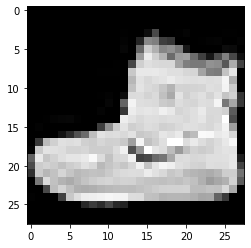

In [ ]:
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

### Preprocess Data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

In [ ]:
# the below may be necessary to reshape the data based on the Keras backend
# for example there could be different image format requirements for TF vs
# another library that Keras is compatible with

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# normalize the X
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

# categorize the y
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
X_train_norm.shape, X_test_norm.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

### Define Model

In [ ]:
model = Sequential()

model.add(Conv2D(
    64,                     # number of filters
    (3, 3),                 # kernal size     
    activation='relu',      # activation function
    input_shape=input_shape # input shape
))

model.add(Conv2D(
    64,
    (3, 3),
    activation='relu'
))

model.add(MaxPooling2D(
    pool_size=(2, 2)
))

model.add(Dropout(0.25))

model.add(Flatten())       # always need to flatten when moving from Conv Layer

model.add(Dense(
    num_classes, 
    activation='softmax'
))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                92170     
Total params: 129,738
Trainable params: 129,738
Non-trainable params: 0
________________________________________________

### Train Model

In [ ]:
import time

print(f"Start: {time.ctime()}")

model.fit(
    X_train_norm, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(X_test_norm, y_test_cat)
)

print(f"End: {time.ctime()}")

Start: Sun Mar 22 15:30:32 2020
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 - 9s - loss: 0.4766 - accuracy: 0.8304 - val_loss: 0.3773 - val_accuracy: 0.8646
Epoch 2/12
60000/60000 - 8s - loss: 0.3117 - accuracy: 0.8907 - val_loss: 0.3111 - val_accuracy: 0.8879
Epoch 3/12
60000/60000 - 8s - loss: 0.2711 - accuracy: 0.9044 - val_loss: 0.2719 - val_accuracy: 0.9026
Epoch 4/12
60000/60000 - 8s - loss: 0.2426 - accuracy: 0.9133 - val_loss: 0.2580 - val_accuracy: 0.9098
Epoch 5/12
60000/60000 - 8s - loss: 0.2197 - accuracy: 0.9201 - val_loss: 0.2515 - val_accuracy: 0.9089
Epoch 6/12
60000/60000 - 8s - loss: 0.2031 - accuracy: 0.9262 - val_loss: 0.2401 - val_accuracy: 0.9152
Epoch 7/12
60000/60000 - 8s - loss: 0.1898 - accuracy: 0.9316 - val_loss: 0.2320 - val_accuracy: 0.9170
Epoch 8/12
60000/60000 - 8s - loss: 0.1785 - accuracy: 0.9348 - val_loss: 0.2334 - val_accuracy: 0.9182
Epoch 9/12
60000/60000 - 8s - loss: 0.1670 - accuracy: 0.9391 - val_loss: 0.2293 - val

### Evaluate Model

In [ ]:
score = model.evaluate(
    X_test_norm, 
    y_test_cat, 
    verbose=0
)

print(f"Loss    : {score[0]}")
print(f"Accuracy: {score[1]}")

Loss    : 0.22508650785684586
Accuracy: 0.9229000210762024


## ResNets in Keras

A Risidual Layer, also known as a skip layer, allows us to add some previous output as an additional input to another layer. This enables our network to go deeper than they would under normal circumstances while still showing a potential improvement in the output

We can look at implementing a ResNet using the CIFAR Dataset


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

from six.moves import cPickle 

import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

### Import the Data

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((50000, 32, 32, 3), (10000, 32, 32, 3)), ((50000, 1), (10000, 1)))

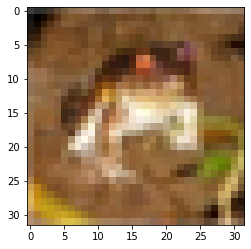

In [ ]:
plt.imshow(X_train[0], cmap='gray', interpolation='nearest')

### Constants for Training

In [ ]:
# Training parameters
BATCH_SIZE = 32  # orig paper trained all networks with batch_size=128
EPOCHS = 200 # 200
USE_AUGMENTATION = True
NUM_CLASSES = np.unique(y_train).shape[0] # 10
COLORS = X_train.shape[3]

# Subtracting pixel mean improves accuracy
# This centers the pixel values around 0
SUBTRACT_PIXEL_MEAN = True

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
VERSION = 1

# Computed depth from supplied model parameter n
if VERSION == 1:
    DEPTH = COLORS * 6 + 2
elif version == 2:
    DEPTH = COLORS * 9 + 2

### Defining the ResNet Functions

The different ResNet functions based on the two papers can be seen defined below. They both make use of the common `resnet_layer` function definition

The papers are:

1. ResNet v1: K. He, X. Zhang, S. Ren, and J. Sun. Deep residual learning for image recognition. arXiv preprint arXiv:1512.03385,2015.
2. ResNet v2: He, K., Zhang, X., Ren, S., & Sun, J. (2016, October). Identity mappings in deep residual networks. In European conference on computer vision (pp. 630-645). Springer, Cham.

The difference between the two is that V2 makes use of batch normalization before each weight layer

#### ResNet Layer Definition

In [ ]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [ ]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

#### ResNet v1

In [ ]:
def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tensorflow.keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

#### ResNet v2

In [ ]:
def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tensorflow.keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

### Normalize Data

In [ ]:
# Input image dimensions
input_shape = X_train.shape[1:]

# Normalize data
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

if SUBTRACT_PIXEL_MEAN:
    X_train_mean = np.mean(X_train, axis=0)
    X_train_norm -= X_train_mean
    X_test_norm -= X_train_mean

# Categorize target
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

### Define Model Based on Version

In [ ]:
if VERSION == 2:
    model = resnet_v2(input_shape=input_shape, depth=DEPTH)
else:
    model = resnet_v1(input_shape=input_shape, depth=DEPTH)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=lr_schedule(0)),
    metrics=['accuracy']
)

model.summary()

Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

### Train Model

In [ ]:
# Prepare callbacks for model saving and for learning rate adjustment.
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(
    factor=np.sqrt(0.1),
    cooldown=0,
    patience=5,
    min_lr=0.5e-6
)

callbacks = [lr_reducer, lr_scheduler]

In the below section we have a choice to use image augmentation which will apply random transformations like resizing and moving around the image so the model does not overfit, it's not really doing anything more complicated than that

In [ ]:
import time

print(f"Start: {time.ctime()}")

# Run training, with or without data augmentation.
if not USE_AUGMENTATION:
    print('Not using data augmentation.')
    model.fit(
        X_train_norm, y_train_cat,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(X_test_norm, y_test_cat),
        shuffle=True,
        callbacks=callbacks
    )
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train_norm)

    model.fit_generator(
        datagen.flow(
          X_train_norm,
          y_train_cat, 
          batch_size=BATCH_SIZE
        ),
        validation_data=(X_test_norm, y_test_cat),
        epochs=EPOCHS, 
        verbose=0, 
        workers=1,
        callbacks=callbacks, 
        use_multiprocessing=False
    )


print(f"End: {time.ctime()}")

Start: Sun Mar 22 15:32:22 2020
Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.

### Evaluate the Model

In [ ]:
scores = model.evaluate(X_test_norm, y_test_cat, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])